In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"D:\Work\Route\HTI\S9\SVM\SVM_Data.csv")

In [7]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

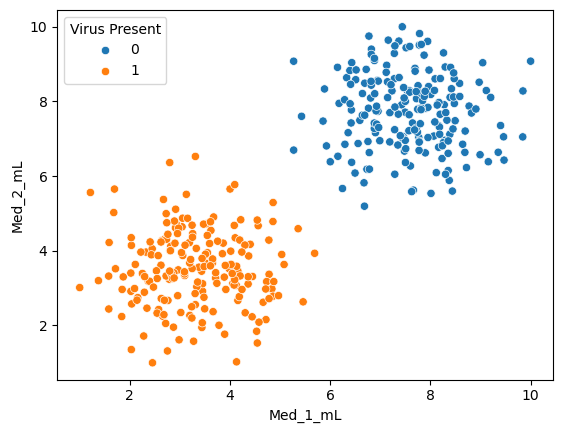

In [13]:
sns.scatterplot(x= 'Med_1_mL',y= 'Med_2_mL',hue= 'Virus Present',data=df)

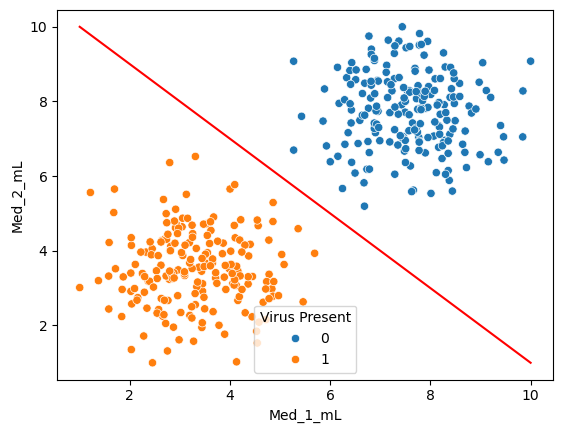

In [29]:
sns.scatterplot(x= 'Med_1_mL',y= 'Med_2_mL',hue= 'Virus Present',data=df)
x = np.linspace(1,10,100)
m = -1
b = 11
y = m*x+b
plt.plot(x,y,color = 'red')

In [175]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [33]:
x = df.drop('Virus Present',axis = 1)
y = df['Virus Present']

In [37]:
from sklearn.model_selection import train_test_split 

In [201]:
x_train , x_test ,y_train,y_test = train_test_split(x,y,
                                                   test_size= 0.2,
                                                   shuffle = True,
                                                   random_state = 5)

In [203]:
from sklearn.svm import SVC

In [205]:
model = SVC(kernel = 'linear',C= 1)

In [207]:
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [94]:
from svm_margin_plot import plot_svm_boundary

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


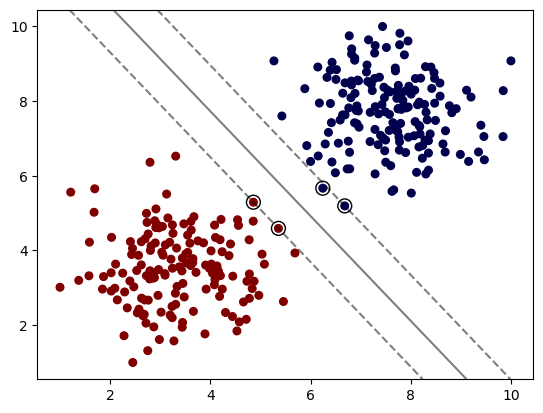

In [96]:
plot_svm_boundary(model,x_train,y_train)

In [131]:
rbf_model = SVC(kernel = 'rbf',gamma= 0.1)
rbf_model.fit(x_train,y_train)

SVC(gamma=0.1)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


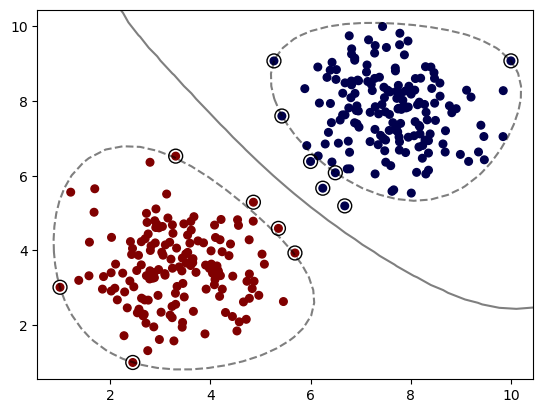

In [133]:
plot_svm_boundary(rbf_model,x_train,y_train)

In [135]:
param={
    'kernel' : ['linear','poly','rbf'],
    'C' : [0.01,0.1,1,10],
    'gamma': [0.01,0.1,1,10]
}

In [137]:
model = SVC() # svc with no param

In [139]:
from sklearn.model_selection import GridSearchCV

In [141]:
gtid_sea = GridSearchCV(model,param)

In [143]:
gtid_sea.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [145]:
gtid_sea.best_estimator_

SVC(C=0.01, gamma=0.01, kernel='linear')

In [209]:
best_model = SVC(C=0.01, gamma=0.01, kernel='linear')
best_model.fit(x_train,y_train)

SVC(C=0.01, gamma=0.01, kernel='linear')

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


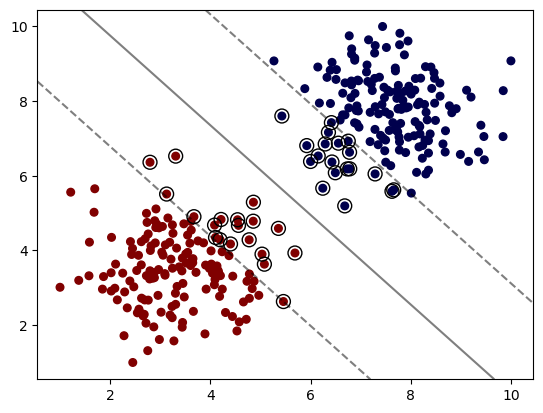

In [155]:
plot_svm_boundary(best_model,x_train,y_train)

In [211]:
y_pred = model.predict(x_test)

In [213]:
y_pred_best = best_model.predict(x_test)

In [215]:
from sklearn.metrics import accuracy_score

In [217]:
accuracy_score(y_test,y_pred)

1.0

In [219]:
accuracy_score(y_test,y_pred_best)

1.0